In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(7130.6104)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 714.02642  validloss 1151.87744±0.00000  bestvalidloss 1151.87744  last_update 0
train: iter 1  trainloss 258.90668  validloss 476.56429±0.00000  bestvalidloss 476.56429  last_update 0
train: iter 2  trainloss -46.59595  validloss 76.45371±0.00000  bestvalidloss 76.45371  last_update 0
train: iter 3  trainloss -446.88010  validloss -200.02026±0.00000  bestvalidloss -200.02026  last_update 0
train: iter 4  trainloss -617.23299  validloss -498.69998±0.00000  bestvalidloss -498.69998  last_update 0
train: iter 5  trainloss -790.65586  validloss -631.41569±0.00000  bestvalidloss -631.41569  last_update 0
train: iter 6  trainloss -909.54426  validloss -720.24344±0.00000  bestvalidloss -720.24344  last_update 0
train: iter 7  trainloss -1006.94372  validloss -876.83221±0.00000  bestvalidloss -876.83221  last_update 0
train: iter 8  trainloss -1053.02872  validloss -753.39948±0.00000  bestvalidloss -876.83221  last_update 1
train: iter 9  trainloss 

train: iter 75  trainloss -1887.67561  validloss -1789.05968±0.00000  bestvalidloss -1914.72161  last_update 1
train: iter 76  trainloss -1986.87277  validloss -1874.49723±0.00000  bestvalidloss -1914.72161  last_update 2
train: iter 77  trainloss -1996.39946  validloss -1900.45127±0.00000  bestvalidloss -1914.72161  last_update 3
train: iter 78  trainloss -2004.91831  validloss -1896.08781±0.00000  bestvalidloss -1914.72161  last_update 4
train: iter 79  trainloss -1993.25295  validloss -1854.10044±0.00000  bestvalidloss -1914.72161  last_update 5
train: iter 80  trainloss -1960.20041  validloss -1763.27038±0.00000  bestvalidloss -1914.72161  last_update 6
train: iter 81  trainloss -2006.97155  validloss -1889.47995±0.00000  bestvalidloss -1914.72161  last_update 7
train: iter 82  trainloss -2001.54262  validloss -1825.30219±0.00000  bestvalidloss -1914.72161  last_update 8
train: iter 83  trainloss -2015.67217  validloss -1924.49162±0.00000  bestvalidloss -1924.49162  last_update 0
t

train: iter 149  trainloss -2101.36173  validloss -2016.88383±0.00000  bestvalidloss -2041.27751  last_update 18
train: iter 150  trainloss -2045.79413  validloss -1816.04192±0.00000  bestvalidloss -2041.27751  last_update 19
train: iter 151  trainloss -2032.90017  validloss -1927.11497±0.00000  bestvalidloss -2041.27751  last_update 20
train: iter 152  trainloss -2058.39086  validloss -2021.58583±0.00000  bestvalidloss -2041.27751  last_update 21
train: iter 153  trainloss -2092.87587  validloss -1968.86277±0.00000  bestvalidloss -2041.27751  last_update 22
train: iter 154  trainloss -2055.68262  validloss -1928.74893±0.00000  bestvalidloss -2041.27751  last_update 23
train: iter 155  trainloss -1746.46735  validloss -1929.98619±0.00000  bestvalidloss -2041.27751  last_update 24
train: iter 156  trainloss -2083.54880  validloss -1897.35718±0.00000  bestvalidloss -2041.27751  last_update 25
train: iter 157  trainloss -2109.72400  validloss -2018.58378±0.00000  bestvalidloss -2041.27751

train: iter 222  trainloss -2101.37487  validloss -2026.77850±0.00000  bestvalidloss -2076.07807  last_update 22
train: iter 223  trainloss -2129.51301  validloss -2041.06486±0.00000  bestvalidloss -2076.07807  last_update 23
train: iter 224  trainloss -2125.99211  validloss -2012.19445±0.00000  bestvalidloss -2076.07807  last_update 24
train: iter 225  trainloss -1943.55720  validloss -1996.72014±0.00000  bestvalidloss -2076.07807  last_update 25
train: iter 226  trainloss -2076.47968  validloss -1993.84103±0.00000  bestvalidloss -2076.07807  last_update 26
train: iter 227  trainloss -2116.09740  validloss -1979.77129±0.00000  bestvalidloss -2076.07807  last_update 27
train: iter 228  trainloss -2130.98284  validloss -2008.12581±0.00000  bestvalidloss -2076.07807  last_update 28
train: iter 229  trainloss -2135.86692  validloss -2056.06879±0.00000  bestvalidloss -2076.07807  last_update 29
train: iter 230  trainloss -2116.43138  validloss -2060.05226±0.00000  bestvalidloss -2076.07807

train: iter 295  trainloss -2154.25812  validloss -2109.04324±0.00000  bestvalidloss -2114.61347  last_update 1
train: iter 296  trainloss -2174.18283  validloss -2093.43464±0.00000  bestvalidloss -2114.61347  last_update 2
train: iter 297  trainloss -2170.44892  validloss -2096.88188±0.00000  bestvalidloss -2114.61347  last_update 3
train: iter 298  trainloss -2172.77637  validloss -2045.38811±0.00000  bestvalidloss -2114.61347  last_update 4
train: iter 299  trainloss -2194.69070  validloss -2063.19957±0.00000  bestvalidloss -2114.61347  last_update 5
train: iter 300  trainloss -2175.05472  validloss -2101.90642±0.00000  bestvalidloss -2114.61347  last_update 6
train: iter 301  trainloss -2090.82459  validloss -2095.53817±0.00000  bestvalidloss -2114.61347  last_update 7
train: iter 302  trainloss -2161.88079  validloss -2010.64784±0.00000  bestvalidloss -2114.61347  last_update 8
train: iter 303  trainloss -2181.28013  validloss -2079.75572±0.00000  bestvalidloss -2114.61347  last_u

train: iter 368  trainloss -2214.90177  validloss -2113.08733±0.00000  bestvalidloss -2153.72430  last_update 6
train: iter 369  trainloss -2216.67865  validloss -2143.37452±0.00000  bestvalidloss -2153.72430  last_update 7
train: iter 370  trainloss -2197.38084  validloss -2113.23819±0.00000  bestvalidloss -2153.72430  last_update 8
train: iter 371  trainloss -2104.65400  validloss -2094.46866±0.00000  bestvalidloss -2153.72430  last_update 9
train: iter 372  trainloss -2115.63218  validloss -1842.52460±0.00000  bestvalidloss -2153.72430  last_update 10
train: iter 373  trainloss -2113.04923  validloss -2049.39766±0.00000  bestvalidloss -2153.72430  last_update 11
train: iter 374  trainloss -2210.43406  validloss -2133.18335±0.00000  bestvalidloss -2153.72430  last_update 12
train: iter 375  trainloss -2199.11736  validloss -2141.71092±0.00000  bestvalidloss -2153.72430  last_update 13
train: iter 376  trainloss -2221.74165  validloss -2149.58167±0.00000  bestvalidloss -2153.72430  la

train: iter 441  trainloss -2241.45620  validloss -2191.43069±0.00000  bestvalidloss -2196.40079  last_update 40
train: iter 442  trainloss -2248.19932  validloss -2149.72968±0.00000  bestvalidloss -2196.40079  last_update 41
train: iter 443  trainloss -2232.21891  validloss -2122.04887±0.00000  bestvalidloss -2196.40079  last_update 42
train: iter 444  trainloss -2258.84980  validloss -2157.35226±0.00000  bestvalidloss -2196.40079  last_update 43
train: iter 445  trainloss -2256.02749  validloss -2181.41986±0.00000  bestvalidloss -2196.40079  last_update 44
train: iter 446  trainloss -2248.20940  validloss -2186.11229±0.00000  bestvalidloss -2196.40079  last_update 45
train: iter 447  trainloss -2229.79206  validloss -2155.15679±0.00000  bestvalidloss -2196.40079  last_update 46
train: iter 448  trainloss -2240.69408  validloss -2141.34826±0.00000  bestvalidloss -2196.40079  last_update 47
train: iter 449  trainloss -2255.67731  validloss -2187.19838±0.00000  bestvalidloss -2196.40079

train: iter 514  trainloss -2274.65378  validloss -2193.06927±0.00000  bestvalidloss -2211.41538  last_update 10
train: iter 515  trainloss -2260.53265  validloss -2188.42198±0.00000  bestvalidloss -2211.41538  last_update 11
train: iter 516  trainloss -2272.28924  validloss -2188.78294±0.00000  bestvalidloss -2211.41538  last_update 12
train: iter 517  trainloss -2266.47647  validloss -2189.74570±0.00000  bestvalidloss -2211.41538  last_update 13
train: iter 518  trainloss -2171.85957  validloss -2074.27603±0.00000  bestvalidloss -2211.41538  last_update 14
train: iter 519  trainloss -2261.73130  validloss -2178.08240±0.00000  bestvalidloss -2211.41538  last_update 15
train: iter 520  trainloss -2269.75762  validloss -2152.83949±0.00000  bestvalidloss -2211.41538  last_update 16
train: iter 521  trainloss -2244.99863  validloss -2208.58302±0.00000  bestvalidloss -2211.41538  last_update 17
train: iter 522  trainloss -2272.20991  validloss -2189.40618±0.00000  bestvalidloss -2211.41538

train: iter 587  trainloss -2162.23779  validloss -2168.80641±0.00000  bestvalidloss -2238.13426  last_update 4
train: iter 588  trainloss -2254.54330  validloss -1957.65872±0.00000  bestvalidloss -2238.13426  last_update 5
train: iter 589  trainloss -2272.87718  validloss -2221.23032±0.00000  bestvalidloss -2238.13426  last_update 6
train: iter 590  trainloss -2274.31108  validloss -2230.38516±0.00000  bestvalidloss -2238.13426  last_update 7
train: iter 591  trainloss -2284.50570  validloss -2197.33002±0.00000  bestvalidloss -2238.13426  last_update 8
train: iter 592  trainloss -2271.11879  validloss -2231.82573±0.00000  bestvalidloss -2238.13426  last_update 9
train: iter 593  trainloss -2235.71564  validloss -2208.36369±0.00000  bestvalidloss -2238.13426  last_update 10
train: iter 594  trainloss -2241.61714  validloss -2110.62385±0.00000  bestvalidloss -2238.13426  last_update 11
train: iter 595  trainloss -2248.32006  validloss -2153.17827±0.00000  bestvalidloss -2238.13426  last

train: iter 660  trainloss -2196.90694  validloss -2219.20170±0.00000  bestvalidloss -2256.09586  last_update 10
train: iter 661  trainloss -2275.65109  validloss -2227.31880±0.00000  bestvalidloss -2256.09586  last_update 11
train: iter 662  trainloss -2259.67070  validloss -2228.25492±0.00000  bestvalidloss -2256.09586  last_update 12
train: iter 663  trainloss -2271.67747  validloss -2253.71755±0.00000  bestvalidloss -2256.09586  last_update 13
train: iter 664  trainloss -2285.89362  validloss -2203.54743±0.00000  bestvalidloss -2256.09586  last_update 14
train: iter 665  trainloss -2277.81591  validloss -2251.76111±0.00000  bestvalidloss -2256.09586  last_update 15
train: iter 666  trainloss -2265.67406  validloss -2234.22702±0.00000  bestvalidloss -2256.09586  last_update 16
train: iter 667  trainloss -2270.66077  validloss -2253.08845±0.00000  bestvalidloss -2256.09586  last_update 17
train: iter 668  trainloss -2285.08300  validloss -2249.38962±0.00000  bestvalidloss -2256.09586

train: iter 733  trainloss -2272.83354  validloss -2225.80930±0.00000  bestvalidloss -2261.49058  last_update 19
train: iter 734  trainloss -2276.59200  validloss -2254.94562±0.00000  bestvalidloss -2261.49058  last_update 20
train: iter 735  trainloss -2277.78604  validloss -2247.27737±0.00000  bestvalidloss -2261.49058  last_update 21
train: iter 736  trainloss -2280.92401  validloss -2278.76923±0.00000  bestvalidloss -2278.76923  last_update 0
train: iter 737  trainloss -2283.98981  validloss -2241.60728±0.00000  bestvalidloss -2278.76923  last_update 1
train: iter 738  trainloss -2291.28560  validloss -2267.65305±0.00000  bestvalidloss -2278.76923  last_update 2
train: iter 739  trainloss -2292.11933  validloss -2253.35172±0.00000  bestvalidloss -2278.76923  last_update 3
train: iter 740  trainloss -2277.41950  validloss -2267.52554±0.00000  bestvalidloss -2278.76923  last_update 4
train: iter 741  trainloss -2292.99713  validloss -2270.62599±0.00000  bestvalidloss -2278.76923  las

train: iter 806  trainloss -2242.32755  validloss -2159.67132±0.00000  bestvalidloss -2278.76923  last_update 70
train: iter 807  trainloss -2280.90089  validloss -2237.43368±0.00000  bestvalidloss -2278.76923  last_update 71
train: iter 808  trainloss -2282.67545  validloss -2271.63688±0.00000  bestvalidloss -2278.76923  last_update 72
train: iter 809  trainloss -2286.85550  validloss -2283.14997±0.00000  bestvalidloss -2283.14997  last_update 0
train: iter 810  trainloss -2287.31069  validloss -2268.77228±0.00000  bestvalidloss -2283.14997  last_update 1
train: iter 811  trainloss -2274.75796  validloss -2242.69706±0.00000  bestvalidloss -2283.14997  last_update 2
train: iter 812  trainloss -2283.49573  validloss -2263.21462±0.00000  bestvalidloss -2283.14997  last_update 3
train: iter 813  trainloss -2268.30170  validloss -2266.59343±0.00000  bestvalidloss -2283.14997  last_update 4
train: iter 814  trainloss -2265.69327  validloss -2223.36226±0.00000  bestvalidloss -2283.14997  las

train: iter 879  trainloss -2291.78596  validloss -2276.42989±0.00000  bestvalidloss -2288.75515  last_update 29
train: iter 880  trainloss -2295.95212  validloss -2279.45425±0.00000  bestvalidloss -2288.75515  last_update 30
train: iter 881  trainloss -2289.78672  validloss -2294.19671±0.00000  bestvalidloss -2294.19671  last_update 0
train: iter 882  trainloss -2270.70456  validloss -2264.43427±0.00000  bestvalidloss -2294.19671  last_update 1
train: iter 883  trainloss -2274.66067  validloss -2214.69359±0.00000  bestvalidloss -2294.19671  last_update 2
train: iter 884  trainloss -2212.22501  validloss -2248.44037±0.00000  bestvalidloss -2294.19671  last_update 3
train: iter 885  trainloss -2261.17176  validloss -2193.63314±0.00000  bestvalidloss -2294.19671  last_update 4
train: iter 886  trainloss -2283.90805  validloss -2254.26271±0.00000  bestvalidloss -2294.19671  last_update 5
train: iter 887  trainloss -2288.79225  validloss -2301.13615±0.00000  bestvalidloss -2301.13615  last

train: iter 953  trainloss -2275.62125  validloss -2250.20779±0.00000  bestvalidloss -2301.22559  last_update 8
train: iter 954  trainloss -2280.25506  validloss -2199.08014±0.00000  bestvalidloss -2301.22559  last_update 9
train: iter 955  trainloss -2282.88439  validloss -2284.68553±0.00000  bestvalidloss -2301.22559  last_update 10
train: iter 956  trainloss -2294.79781  validloss -2294.97657±0.00000  bestvalidloss -2301.22559  last_update 11
train: iter 957  trainloss -2272.96940  validloss -2268.17488±0.00000  bestvalidloss -2301.22559  last_update 12
train: iter 958  trainloss -2267.56115  validloss -2189.22027±0.00000  bestvalidloss -2301.22559  last_update 13
train: iter 959  trainloss -2297.02262  validloss -2223.27000±0.00000  bestvalidloss -2301.22559  last_update 14
train: iter 960  trainloss -2289.17492  validloss -2274.35912±0.00000  bestvalidloss -2301.22559  last_update 15
train: iter 961  trainloss -2284.97296  validloss -2267.53141±0.00000  bestvalidloss -2301.22559  

train: iter 1026  trainloss -2295.45308  validloss -2262.44913±0.00000  bestvalidloss -2301.50415  last_update 11
train: iter 1027  trainloss -2271.12992  validloss -2275.11096±0.00000  bestvalidloss -2301.50415  last_update 12
train: iter 1028  trainloss -2278.95284  validloss -2270.84030±0.00000  bestvalidloss -2301.50415  last_update 13
train: iter 1029  trainloss -2282.09018  validloss -2248.61071±0.00000  bestvalidloss -2301.50415  last_update 14
train: iter 1030  trainloss -2302.11156  validloss -2291.00419±0.00000  bestvalidloss -2301.50415  last_update 15
train: iter 1031  trainloss -2291.86823  validloss -2268.49883±0.00000  bestvalidloss -2301.50415  last_update 16
train: iter 1032  trainloss -2304.24941  validloss -2294.17300±0.00000  bestvalidloss -2301.50415  last_update 17
train: iter 1033  trainloss -2303.43129  validloss -2293.35317±0.00000  bestvalidloss -2301.50415  last_update 18
train: iter 1034  trainloss -2303.01880  validloss -2301.88555±0.00000  bestvalidloss -2

train: iter 1099  trainloss -2309.25812  validloss -2272.16111±0.00000  bestvalidloss -2305.94860  last_update 46
train: iter 1100  trainloss -2307.81317  validloss -2259.56119±0.00000  bestvalidloss -2305.94860  last_update 47
train: iter 1101  trainloss -2319.68135  validloss -2293.04364±0.00000  bestvalidloss -2305.94860  last_update 48
train: iter 1102  trainloss -2298.94215  validloss -2293.65251±0.00000  bestvalidloss -2305.94860  last_update 49
train: iter 1103  trainloss -2286.85983  validloss -2245.68327±0.00000  bestvalidloss -2305.94860  last_update 50
train: iter 1104  trainloss -2298.08553  validloss -2290.95246±0.00000  bestvalidloss -2305.94860  last_update 51
train: iter 1105  trainloss -2295.93674  validloss -2291.98253±0.00000  bestvalidloss -2305.94860  last_update 52
train: iter 1106  trainloss -2304.73784  validloss -2250.30319±0.00000  bestvalidloss -2305.94860  last_update 53
train: iter 1107  trainloss -2235.76102  validloss -2295.61880±0.00000  bestvalidloss -2

train: iter 1171  trainloss -2307.84060  validloss -2291.34510±0.00000  bestvalidloss -2307.53204  last_update 5
train: iter 1172  trainloss -2309.84708  validloss -2289.17234±0.00000  bestvalidloss -2307.53204  last_update 6
train: iter 1173  trainloss -2313.99543  validloss -2269.90416±0.00000  bestvalidloss -2307.53204  last_update 7
train: iter 1174  trainloss -2298.55465  validloss -2291.04165±0.00000  bestvalidloss -2307.53204  last_update 8
train: iter 1175  trainloss -2312.93136  validloss -2294.28314±0.00000  bestvalidloss -2307.53204  last_update 9
train: iter 1176  trainloss -2313.11394  validloss -2301.56226±0.00000  bestvalidloss -2307.53204  last_update 10
train: iter 1177  trainloss -2317.39543  validloss -2308.17352±0.00000  bestvalidloss -2308.17352  last_update 0
train: iter 1178  trainloss -2303.14421  validloss -2297.93521±0.00000  bestvalidloss -2308.17352  last_update 1
train: iter 1179  trainloss -2289.64793  validloss -2272.39040±0.00000  bestvalidloss -2308.173

train: iter 1244  trainloss -2317.43029  validloss -2287.21507±0.00000  bestvalidloss -2310.93801  last_update 45
train: iter 1245  trainloss -2295.36373  validloss -2299.36266±0.00000  bestvalidloss -2310.93801  last_update 46
train: iter 1246  trainloss -2308.79263  validloss -2303.87147±0.00000  bestvalidloss -2310.93801  last_update 47
train: iter 1247  trainloss -2302.09650  validloss -2241.02003±0.00000  bestvalidloss -2310.93801  last_update 48
train: iter 1248  trainloss -2310.26398  validloss -2292.24529±0.00000  bestvalidloss -2310.93801  last_update 49
train: iter 1249  trainloss -2306.39586  validloss -2289.81238±0.00000  bestvalidloss -2310.93801  last_update 50
train: iter 1250  trainloss -2313.86632  validloss -2273.03461±0.00000  bestvalidloss -2310.93801  last_update 51
train: iter 1251  trainloss -2308.88300  validloss -2271.29921±0.00000  bestvalidloss -2310.93801  last_update 52
train: iter 1252  trainloss -2296.02329  validloss -2271.79832±0.00000  bestvalidloss -2

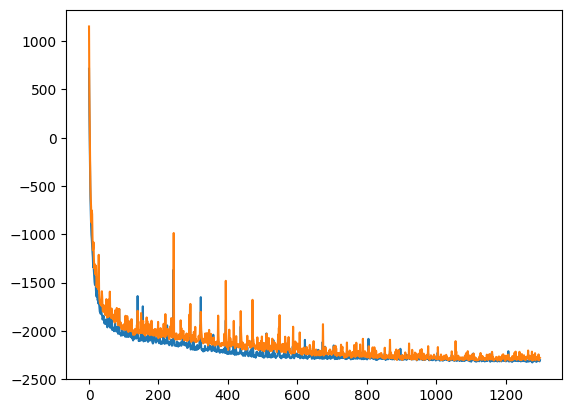

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 4.66323  validloss 4.90594±0.00000  bestvalidloss 4.90594  last_update 0
train: iter 1  trainloss 4.24380  validloss 4.46825±0.00000  bestvalidloss 4.46825  last_update 0
train: iter 2  trainloss 3.90014  validloss 4.06896±0.00000  bestvalidloss 4.06896  last_update 0
train: iter 3  trainloss 3.61096  validloss 3.76208±0.00000  bestvalidloss 3.76208  last_update 0
train: iter 4  trainloss 3.36124  validloss 3.48925±0.00000  bestvalidloss 3.48925  last_update 0
train: iter 5  trainloss 3.15129  validloss 3.26759±0.00000  bestvalidloss 3.26759  last_update 0
train: iter 6  trainloss 2.97715  validloss 3.07498±0.00000  bestvalidloss 3.07498  last_update 0
train: iter 7  trainloss 2.83236  validloss 2.91355±0.00000  bestvalidloss 2.91355  last_update 0
train: iter 8  trainloss 2.70236  validloss 2.77296±0.00000  bestvalidloss 2.77296  last_update 0
train: iter 9  trainloss 2.58409  validloss 2.65383±0.00000  bestvalidloss 2.65383  last_update 0
train: iter 10  trai

train: iter 88  trainloss -0.80761  validloss -0.79745±0.00000  bestvalidloss -0.79745  last_update 0
train: iter 89  trainloss -0.84571  validloss -0.83353±0.00000  bestvalidloss -0.83353  last_update 0
train: iter 90  trainloss -0.88474  validloss -0.87139±0.00000  bestvalidloss -0.87139  last_update 0
train: iter 91  trainloss -0.91987  validloss -0.90607±0.00000  bestvalidloss -0.90607  last_update 0
train: iter 92  trainloss -0.94940  validloss -0.94926±0.00000  bestvalidloss -0.94926  last_update 0
train: iter 93  trainloss -0.99432  validloss -0.98843±0.00000  bestvalidloss -0.98843  last_update 0
train: iter 94  trainloss -1.03222  validloss -1.01890±0.00000  bestvalidloss -1.01890  last_update 0
train: iter 95  trainloss -1.06791  validloss -1.05361±0.00000  bestvalidloss -1.05361  last_update 0
train: iter 96  trainloss -1.10252  validloss -1.10205±0.00000  bestvalidloss -1.10205  last_update 0
train: iter 97  trainloss -1.14541  validloss -1.12986±0.00000  bestvalidloss -1.1

train: iter 181  trainloss -1.99590  validloss -2.04526±0.00000  bestvalidloss -2.31530  last_update 13
train: iter 182  trainloss -1.83877  validloss -2.20598±0.00000  bestvalidloss -2.31530  last_update 14
train: iter 183  trainloss -1.99617  validloss -2.05426±0.00000  bestvalidloss -2.31530  last_update 15
train: iter 184  trainloss -2.00666  validloss -2.13702±0.00000  bestvalidloss -2.31530  last_update 16
train: iter 185  trainloss -2.04223  validloss -2.02574±0.00000  bestvalidloss -2.31530  last_update 17
train: iter 186  trainloss -1.96468  validloss -2.05436±0.00000  bestvalidloss -2.31530  last_update 18
train: iter 187  trainloss -1.86624  validloss -2.21757±0.00000  bestvalidloss -2.31530  last_update 19
train: iter 188  trainloss -1.92953  validloss -2.12628±0.00000  bestvalidloss -2.31530  last_update 20
train: iter 189  trainloss -1.99711  validloss -2.13110±0.00000  bestvalidloss -2.31530  last_update 21
train: iter 190  trainloss -1.97110  validloss -2.09627±0.00000 

train: iter 262  trainloss -1.95419  validloss -2.23417±0.00000  bestvalidloss -2.31530  last_update 94
train: iter 263  trainloss -1.91345  validloss -1.93682±0.00000  bestvalidloss -2.31530  last_update 95
train: iter 264  trainloss -1.99550  validloss -2.22050±0.00000  bestvalidloss -2.31530  last_update 96
train: iter 265  trainloss -1.97605  validloss -2.11204±0.00000  bestvalidloss -2.31530  last_update 97
train: iter 266  trainloss -1.98919  validloss -2.10753±0.00000  bestvalidloss -2.31530  last_update 98
train: iter 267  trainloss -1.92658  validloss -2.24502±0.00000  bestvalidloss -2.31530  last_update 99
train: iter 268  trainloss -1.89092  validloss -2.24182±0.00000  bestvalidloss -2.31530  last_update 100
train: fin


In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-2.8244, -6.7396], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 129.23136  validloss 140.88033±0.00000  bestvalidloss 140.88033  last_update 0
train: iter 1  trainloss 97.11752  validloss 113.59100±0.00000  bestvalidloss 113.59100  last_update 0
train: iter 2  trainloss 73.53124  validloss 83.04096±0.00000  bestvalidloss 83.04096  last_update 0
train: iter 3  trainloss 58.31380  validloss 64.68049±0.00000  bestvalidloss 64.68049  last_update 0
train: iter 4  trainloss 46.82809  validloss 52.01321±0.00000  bestvalidloss 52.01321  last_update 0
train: iter 5  trainloss 37.83215  validloss 42.13834±0.00000  bestvalidloss 42.13834  last_update 0
train: iter 6  trainloss 30.64631  validloss 34.25031±0.00000  bestvalidloss 34.25031  last_update 0
train: iter 7  trainloss 24.74656  validloss 27.85874±0.00000  bestvalidloss 27.85874  last_update 0
train: iter 8  trainloss 19.87746  validloss 22.58892±0.00000  bestvalidloss 22.58892  last_update 0
train: iter 9  trainloss 15.86784  validloss 18.00702±0.00000  bestvalidloss 18.00702 

train: iter 83  trainloss 0.80151  validloss 2.00142±0.00000  bestvalidloss 1.92779  last_update 22
train: iter 84  trainloss 0.79293  validloss 2.25895±0.00000  bestvalidloss 1.92779  last_update 23
train: iter 85  trainloss 0.78968  validloss 2.19544±0.00000  bestvalidloss 1.92779  last_update 24
train: iter 86  trainloss 0.78259  validloss 2.31839±0.00000  bestvalidloss 1.92779  last_update 25
train: iter 87  trainloss 0.79663  validloss 2.09779±0.00000  bestvalidloss 1.92779  last_update 26
train: iter 88  trainloss 0.78641  validloss 2.47577±0.00000  bestvalidloss 1.92779  last_update 27
train: iter 89  trainloss 0.78135  validloss 1.68457±0.00000  bestvalidloss 1.68457  last_update 0
train: iter 90  trainloss 0.77475  validloss 1.94497±0.00000  bestvalidloss 1.68457  last_update 1
train: iter 91  trainloss 0.77773  validloss 1.94609±0.00000  bestvalidloss 1.68457  last_update 2
train: iter 92  trainloss 0.76909  validloss 2.45831±0.00000  bestvalidloss 1.68457  last_update 3
trai

train: iter 167  trainloss 0.68731  validloss 1.99563±0.00000  bestvalidloss 1.67936  last_update 1
train: iter 168  trainloss 0.69236  validloss 1.71217±0.00000  bestvalidloss 1.67936  last_update 2
train: iter 169  trainloss 0.68851  validloss 1.76763±0.00000  bestvalidloss 1.67936  last_update 3
train: iter 170  trainloss 0.69738  validloss 1.77327±0.00000  bestvalidloss 1.67936  last_update 4
train: iter 171  trainloss 0.69577  validloss 2.17994±0.00000  bestvalidloss 1.67936  last_update 5
train: iter 172  trainloss 0.69598  validloss 2.17114±0.00000  bestvalidloss 1.67936  last_update 6
train: iter 173  trainloss 0.70358  validloss 1.90144±0.00000  bestvalidloss 1.67936  last_update 7
train: iter 174  trainloss 0.68966  validloss 2.56003±0.00000  bestvalidloss 1.67936  last_update 8
train: iter 175  trainloss 0.68229  validloss 2.28501±0.00000  bestvalidloss 1.67936  last_update 9
train: iter 176  trainloss 0.70683  validloss 2.17293±0.00000  bestvalidloss 1.67936  last_update 10

train: iter 249  trainloss 0.67437  validloss 2.26242±0.00000  bestvalidloss 1.66319  last_update 50
train: iter 250  trainloss 0.68884  validloss 2.22298±0.00000  bestvalidloss 1.66319  last_update 51
train: iter 251  trainloss 0.67983  validloss 2.12519±0.00000  bestvalidloss 1.66319  last_update 52
train: iter 252  trainloss 0.68224  validloss 1.83220±0.00000  bestvalidloss 1.66319  last_update 53
train: iter 253  trainloss 0.68929  validloss 1.91906±0.00000  bestvalidloss 1.66319  last_update 54
train: iter 254  trainloss 0.68169  validloss 2.07993±0.00000  bestvalidloss 1.66319  last_update 55
train: iter 255  trainloss 0.68568  validloss 1.86962±0.00000  bestvalidloss 1.66319  last_update 56
train: iter 256  trainloss 0.68464  validloss 1.77390±0.00000  bestvalidloss 1.66319  last_update 57
train: iter 257  trainloss 0.67574  validloss 2.68381±0.00000  bestvalidloss 1.66319  last_update 58
train: iter 258  trainloss 0.68181  validloss 2.10759±0.00000  bestvalidloss 1.66319  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-9.5640)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-4.4099)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.280383794748961
tensor([0.4151])
